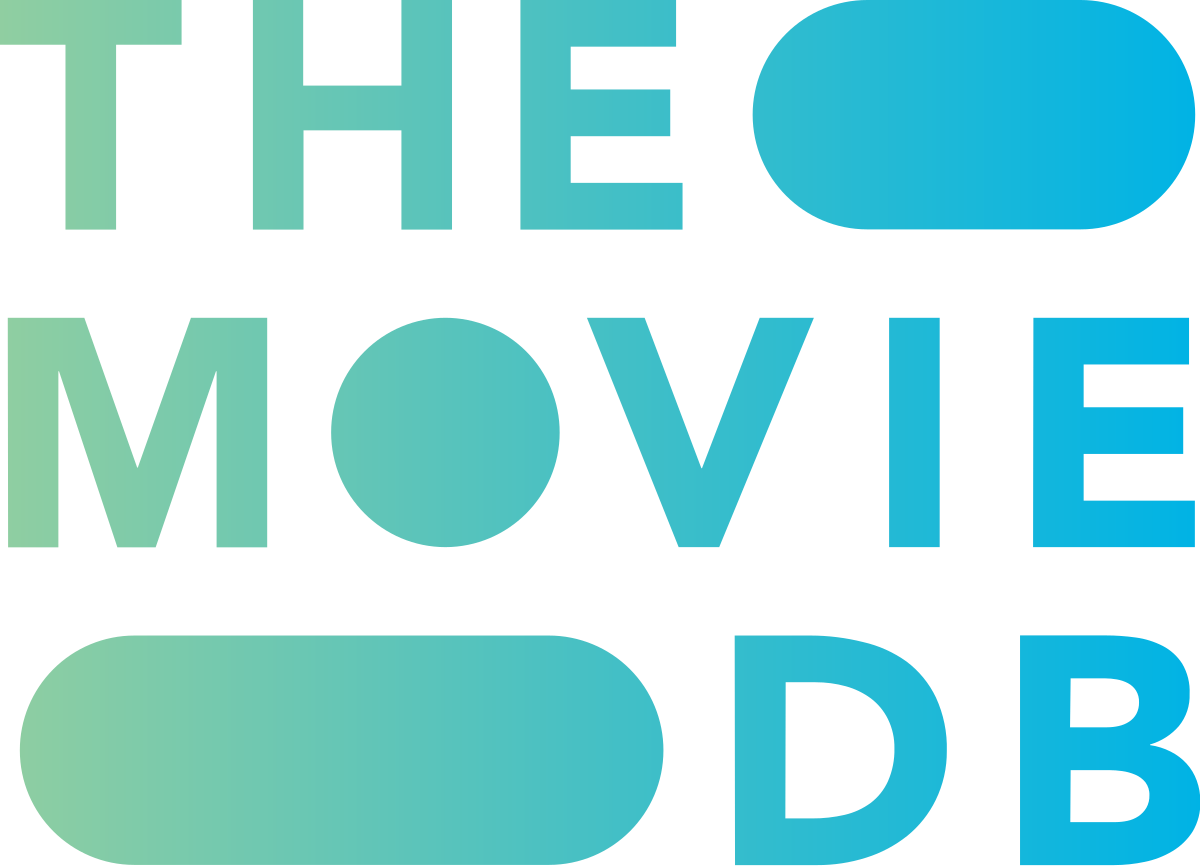


## **Table of Content**


1. INTRODUCTION
>1.1 OVERVIEW<BR>1.2 DATA DESCRIPTION


2. REPOSITORY
>2.1 IMPORT LIBRARIES<BR>2.2 LOAD DATA SET & DATA PREPARATION


3.  QUESTIONS
>3.1 WHAT GENRES ARE THE MOST POPULAR? <BR>3.2 WHAT IS THE TREND OF MOVIES RELEASES OVER THE YEAR? <BR>3.3 WHAT MOVIES HAVE THE HIGHEST PROFIT?<BR> 3.4 IS THERE A CORRELATION BETWEEN BUDGET & REVENUE? <BR> 3.5 WHAT IS THE AVERAGE RUNTIME OF MOVIES PER GENRE? <BR>3.6 WHAT PRODUCTION COMPANIES HAVE PRODUCED THE MOST MOVIES? <BR> 3.7 HOW DOES VOTE AVERAGE VARY ACROSS GENRES?


4. CONCLUSION

# **1. INTRODUCTION**

## **1.1 OVERVIEW**

This project involves analyzing the TMDb movie dataset to uncover patterns and insights in the film industry. By leveraging Python and SQL to explore various aspects such as genre popularity, release trends, and profitability. The findings aim to assist stakeholders in making informed decisions based on data-driven evidence.

The objectives include:
* Identify popular genres.
* Analyze movie release trends.
* Determine factors contributing to high profits


## **1.2 DATA DESCRIPTION**

The dataset consists of 4,803 rows and 20 columns and can be found [here](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). Columns such as **genres, keywords, production_companies, production_countries, spoken_languages** are made up of JSON-like strings and were needed to be converted to readable list. The dataset consists of both numerical and categorical variables. The **budget, id, popularity, revenue, runtime, vote_average, and vote_count** all contain numerical variables, while the other columns contain categorical variables.


# **2. REPOSITORY**

## **2.1 IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import json

## **2.2 LOAD DATA SET & DATA PREPARATION**

In [ ]:
# load data
tmdb = pd.read_csv("tmdb_movies.csv")
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
tmdb.shape

(4803, 20)

In [ ]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
tmdb.isnull().sum()


,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


For the sake of this project, some columns would be dropped. The columns are; homepage, tagline, popularity. The rows having null values in overview, release_date, and runtime will be dropped, leaving a total of **4799** rows left to work with.

In [ ]:
# dropping the unwanted columns
tmdb.drop(["homepage", "tagline", "popularity"], axis=1, inplace=True)


# dropping all the rows with missing values
tmdb.dropna(inplace=True)

# verify
tmdb.shape

(4799, 17)

In [ ]:
# convert the JSON-like stirngs into readable list
tmdb["genres"] = tmdb["genres"].apply(
    lambda x: ', '.join([i["name"] for i in json.loads(x)]) if x else None
)

# verify
tmdb.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


In [ ]:
# convert the JSON-like stirngs into readable list
tmdb["keywords"] = tmdb["keywords"].apply(
    lambda x: ', '.join([i['name'] for i in json.loads(x)]) if x else None
)

# verify
tmdb.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


In [ ]:
# convert the JSON-like stirngs into readable list
tmdb["production_companies"] = tmdb["production_companies"].apply(
    lambda x: ', '.join([i["name"] for i in json.loads(x)]) if x else None
)

# verify
tmdb.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","Ingenious Film Partners, Twentieth Century Fox...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


In [ ]:
# convert the JSON-like stirngs into readable list
tmdb["production_countries"] = tmdb["production_countries"].apply(
    lambda x: ', '.join([i["name"] for i in json.loads(x)]) if x else None
)

# verify
tmdb.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


In [ ]:
# convert the JSON-like stirngs into readable list
tmdb["spoken_languages"] = tmdb["spoken_languages"].apply(
    lambda x: ', '.join([i["name"] for i in json.loads(x)]) if x else None
)

# verify
tmdb.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Avatar,7.2,11800


In [ ]:
# create a sqlite database connection
conn = sqlite3.connect("mydatabase.db")

# load data to sqlite
tmdb.to_sql("tmdb", conn, index = False, if_exists = "replace")

4799

In [ ]:
query = """
       SELECT genres FROM tmdb;
"""
pd.read_sql_query(query, conn)

,genres
0,"Action, Adventure, Fantasy, Science Fiction"
1,"Adventure, Fantasy, Action"
2,"Action, Adventure, Crime"
3,"Action, Crime, Drama, Thriller"
4,"Action, Adventure, Science Fiction"
...,...
4794,"Action, Crime, Thriller"
4795,"Comedy, Romance"
4796,"Comedy, Drama, Romance, TV Movie"
4797,


# **3. ANALYTICAL QUESTIONS**

## **3.1 WHAT GENRES ARE MOST POPULAR?**

In [ ]:
# top 5 most popular genres
query = """
        SELECT genres, COUNT (*) as Count
        FROM tmdb
        GROUP BY genres
        ORDER BY Count DESC
        LIMIT 5;
"""
pd.read_sql_query(query, conn)

,genres,Count
0,Drama,369
1,Comedy,282
2,"Drama, Romance",164
3,"Comedy, Romance",144
4,"Comedy, Drama",142


## **3.2 WHAT IS THE TREND OF MOVIES RELEASES OVER THE YEAR?**

In [ ]:
query = """
      SELECT strftime("%Y", release_date) as Year, Count(*) as Count
      FROM tmdb
      GROUP BY Year
      ORDER BY Year;
"""
pd.read_sql_query(query, conn)

,Year,Count
0,1916,1
1,1925,1
2,1927,1
3,1929,2
4,1930,1
...,...,...
85,2013,231
86,2014,237
87,2015,214
88,2016,104


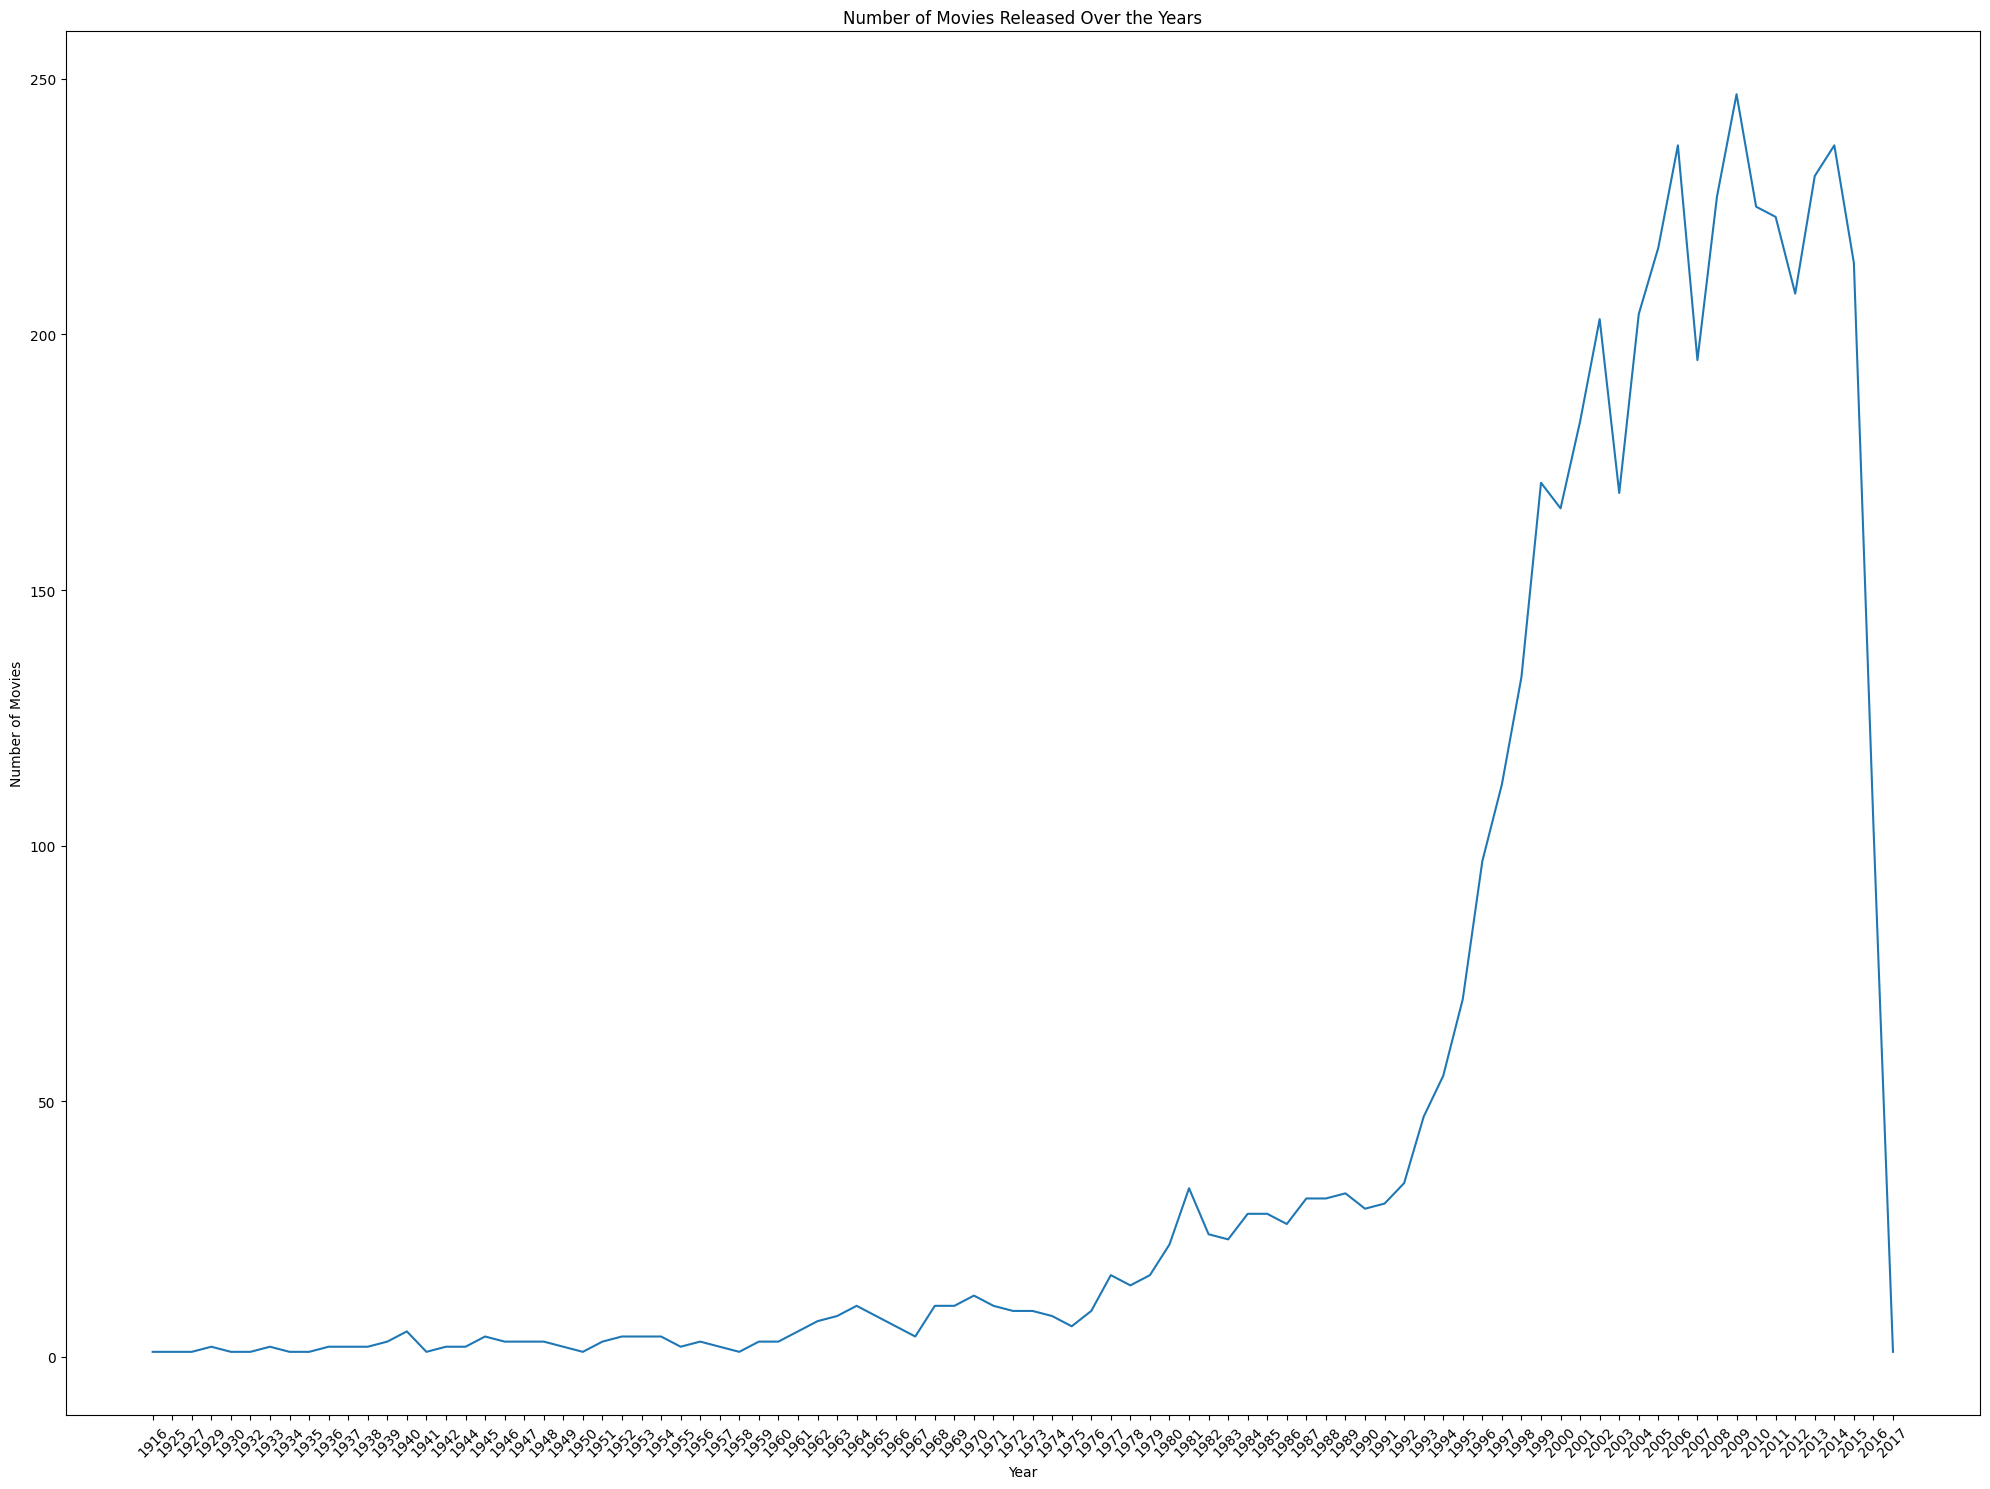

In [ ]:
# visualise
release_trend = pd.read_sql_query("SELECT strftime('%Y', release_date) as year, COUNT(*) as count FROM tmdb GROUP BY year ORDER BY year;", conn)
plt.figure(figsize=(20,15))
sns.lineplot(data=release_trend, x="year", y="count")
plt.title("Number of Movies Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **3.3 WHAT MOVIES HAVE THE HIGHEST PROFIT?**

In [146]:
# top 10 movies with the highest profit
query = """
       SELECT title, revenue - budget as Profit
       FROM tmdb
       ORDER BY profit DESC
       LIMIT 10;
"""
pd.read_sql_query(query, conn)

,title,Profit
0,Avatar,2550965087
1,Titanic,1645034188
2,Jurassic World,1363528810
3,Furious 7,1316249360
4,The Avengers,1299557910
5,Avengers: Age of Ultron,1125403694
6,Frozen,1124219009
7,Minions,1082730962
8,The Lord of the Rings: The Return of the King,1024888979
9,Iron Man 3,1015439994


## **3.4 IS THERE A CORRELATION BETWEEN BUDGET & REVENUE?**

In [147]:
query = """
       SELECT budget, revenue
       FROM tmdb
       WHERE budget > 0 AND revenue > 0;
"""
pd.read_sql_query(query, conn)

,budget,revenue
0,237000000,2787965087
1,300000000,961000000
2,245000000,880674609
3,250000000,1084939099
4,260000000,284139100
...,...,...
3224,27000,3151130
3225,12000,6000000
3226,20000,99000
3227,7000,424760


## **3.5 WHAT IS THE AVERAGE RUNTIME OF MOVIES PER GENRE?**

In [151]:
query = """
       SELECT genres, AVG(runtime) as Avg_runtime
       FROM tmdb
       GROUP BY genres
       ORDER BY Avg_runtime DESC;
"""
pd.read_sql_query(query, conn)

,genres,Avg_runtime
0,"Crime, Drama, Thriller, History",338.000000
1,"History, Documentary, Music",225.000000
2,"Action, Drama, History, Western",219.000000
3,"Adventure, Drama, History, War",216.000000
4,"Drama, Action, Western",191.000000
...,...,...
1170,,52.259259
1171,"Animation, Family, Comedy, TV Movie",25.000000
1172,"Music, Horror",0.000000
1173,"Horror, Documentary, Mystery",0.000000


## **3.6 WHAT PRODUCTION COMPANIES HAVE PRODUCED THE MOST MOVIES?**

In [154]:
query = """
       SELECT production_companies, Count(*) as Count
       FROM tmdb
       GROUP BY production_companies
       ORDER BY Count DESC
       LIMIT 6;
"""
pd.read_sql_query(query, conn)

,production_companies,Count
0,,349
1,Paramount Pictures,58
2,Universal Pictures,45
3,New Line Cinema,38
4,Columbia Pictures,37
5,Metro-Goldwyn-Mayer (MGM),32


## **3.7 HOW DOES VOTE AVERAGE VARY ACROSS GENRES?**

In [160]:
query = """
        SELECT genres, AVG(vote_average) as vote_avg_count
        FROM tmdb
        GROUP BY genres
        ORDER BY vote_avg_count DESC;
"""
pd.read_sql_query(query, conn)

,genres,vote_avg_count
0,"Western, Action, Drama, History",9.3
1,"Fantasy, Drama, Crime",8.2
2,"Fantasy, Animation, Adventure",8.2
3,"Drama, Action, Crime, Thriller",8.2
4,"Adventure, Fantasy, Animation",8.2
...,...,...
1170,"Action, Crime, Comedy, Thriller",2.0
1171,"Action, Comedy, Drama, Western",1.0
1172,"Thriller, Horror, Comedy",0.0
1173,"Thriller, Comedy, Mystery",0.0


# **4. CONCLUSION**

The analysis of the TMDb dataset revealed significant trends in movie production and success factors. Genres like Drama and Comedy dominate the industry, while the number of movies released annually has steadily increased.

Understanding genre popularity and release trends can guide production decisions. However, a high budget doesn't guarantee high revenue, emphasizing the need for strategic planning.

**Findings**
* Drama is the most produced genre.
* Movie releases have increased over the years.
* High budget doesn't always equate to high profit

**Recommendations**

* Focus on producing content in popular genres

* Analyze market trends before budgeting

* Consider audience preferences to maximize profitability